# **Згорткові Нейронні Мережі (ЗНМ) або Convolutional Neural Networks (CNN)**

**Застосування**

![image](https://www.mdpi.com/electronics/electronics-10-02470/article_deploy/html/images/electronics-10-02470-g013.png)

![image](https://miro.medium.com/v2/resize:fit:1024/1*9roDC1WM2DwwQMyzzuIcFg.jpeg)




# **Fully Connected Neural Network**

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, fashion_mnist

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

num_classes = 10
num_features = np.product(x_train.shape[1:])  # 32x32 image with RGB channels

learning_rate = 0.0001
batch_size = 256

steps_per_epoch = len(x_train) // batch_size
print("steps_per_epoch", steps_per_epoch)

# Convert integer pixels to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten 32x32x3 matrices into 3072-element vectors
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize pixel values
x_train, x_test = x_train / 255., x_test / 255.

# Shuffle training data
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
steps_per_epoch 195


In [8]:
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, InputLayer
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

model = Sequential([
    InputLayer(input_shape=(num_features,)),  # Flatten the input vector
    Dense(512, activation='relu'),  #
    Dropout(0.2),
    Dense(256, activation='relu'),  # Added another layer
    Dropout(0.2),
    Dense(128, activation='relu'),  # Added another layer
    Dense(10, activation='softmax')  # Output layer
])

# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=50, verbose=1)

callbacks = [lr_scheduler]

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
No

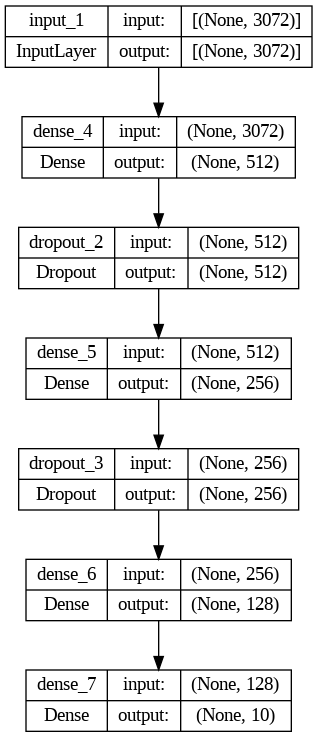

In [9]:
# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [10]:
# Train the model
history = model.fit(train_data,
                    epochs=100,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )


Epoch 1/100
195/195 [==============================] - 3s 9ms/step - loss: 2.0128 - accuracy: 0.2671 - val_loss: 1.8126 - val_accuracy: 0.3627 - lr: 1.0000e-04
Epoch 2/100
195/195 [==============================] - 1s 7ms/step - loss: 1.8121 - accuracy: 0.3527 - val_loss: 1.7011 - val_accuracy: 0.3995 - lr: 1.0000e-04
Epoch 3/100
195/195 [==============================] - 1s 7ms/step - loss: 1.7315 - accuracy: 0.3841 - val_loss: 1.6430 - val_accuracy: 0.4216 - lr: 1.0000e-04
Epoch 4/100
195/195 [==============================] - 1s 7ms/step - loss: 1.6807 - accuracy: 0.4021 - val_loss: 1.5967 - val_accuracy: 0.4374 - lr: 1.0000e-04
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 1.6438 - accuracy: 0.4152 - val_loss: 1.5989 - val_accuracy: 0.4324 - lr: 1.0000e-04
Epoch 6/100
195/195 [==============================] - 3s 14ms/step - loss: 1.6075 - accuracy: 0.4288 - val_loss: 1.5317 - val_accuracy: 0.4601 - lr: 1.0000e-04
Epoch 7/100
195/195 [==================

# **Згорткова Нейронна Мережа (Convolutional Neural Network)**

In [11]:
x_train.shape, y_train.shape

((50000, 3072), (50000, 1))

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.datasets import fashion_mnist

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reshape the data to include the channel dimension (1 for grayscale images)
x_train = x_train.reshape((-1, 32, 32, 3)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 32, 32, 3)).astype("float32") / 255.0

print(x_train.shape)
print(x_test.shape)

num_classes = 10
learning_rate = 0.001
batch_size = 256

steps_per_epoch = len(x_train) // batch_size
print("steps_per_epoch", steps_per_epoch)

# Створення об'єкту Dataset для тренувальних даних (ознаки та цільова змінна)
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))

batch_size = 512 # Формування пакетів розміром 512
# Налаштування обробки тренувального набору даних
dataset_train = (dataset_train
                 .repeat()  # Повторення даних для кількості епох
                 .shuffle(1024)  # Випадкове перетасовування з буфером розміром 1024
                 .batch(batch_size)  # Формування пакетів розміром 512
                 .prefetch(tf.data.experimental.AUTOTUNE)  # Завантаження наступного пакету в пам'ять
                 )

# Створення об'єкту Dataset для тестових даних (ознаки та цільова змінна)
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)



(50000, 32, 32, 3)
(10000, 32, 32, 3)
steps_per_epoch 195


In [34]:
initializer = tf.keras.initializers.GlorotNormal(seed=0)

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=(5, 5), kernel_initializer=initializer, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(5, 5), kernel_initializer=initializer, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5, seed=0),

    Flatten(),
    Dense(1024, kernel_initializer=initializer, activation="relu"),
    Dropout(0.5, seed=0),
    Dense(10, kernel_initializer=initializer, activation="softmax")
])

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 5, 5, 128)         0         
                                                                 
 flatten_7 (Flatten)         (None, 3200)             

In [32]:



# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [33]:
# Train the model
history = model.fit(dataset_train,
                    epochs=2,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=dataset_test,
                    callbacks=callbacks
                    )


Epoch 1/2
194/195 [============================>.] - ETA: 0s - loss: 1.5749 - accuracy: 0.4253
Epoch 1: val_accuracy improved from -inf to 0.55760, saving model to best_model.h5
195/195 [==============================] - 9s 36ms/step - loss: 1.5735 - accuracy: 0.4258 - val_loss: 1.2408 - val_accuracy: 0.5576 - lr: 0.0010
Epoch 2/2
195/195 [==============================] - ETA: 0s - loss: 1.2026 - accuracy: 0.5742
Epoch 2: val_accuracy improved from 0.55760 to 0.63780, saving model to best_model.h5
195/195 [==============================] - 6s 32ms/step - loss: 1.2026 - accuracy: 0.5742 - val_loss: 1.0308 - val_accuracy: 0.6378 - lr: 0.0010


In [30]:
loss, accuracy = model.evaluate(dataset_test)
print(f"Test accuracy: {accuracy*100:.2f}%")


20/20 [==============================] - 0s 11ms/step - loss: 1.1341 - accuracy: 0.5963
Test accuracy: 59.63%


# **Data Augmentation**

In [35]:
import albumentations as A

In [36]:
def augment_image(image, label):
    # Define the augmentation pipeline
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),
        A.CoarseDropout(max_holes=8, max_height=4, max_width=4, fill_value=0, p=0.5),  # Similar to Random Erasing
        A.RandomContrast(limit=0.2, p=0.5),
        A.RandomBrightness(limit=0.2, p=0.5),
        A.Cutout(num_holes=8, max_h_size=8, max_w_size=8, fill_value=0, p=0.5)  # Another form of Random Erasing
    ])

    # Apply the augmentations
    augmented_image = transform(image=image.numpy())['image']
    return augmented_image, label


In [37]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset
                 .shuffle(buffer_size=1024)
                 .batch(batch_size)
                 .map(lambda x, y: tf.py_function(augment_image, [x, y], [tf.float32, tf.int64]),
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
                 .prefetch(tf.data.experimental.AUTOTUNE)
)


In [38]:

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(5, 5), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])


# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 5, 5, 128)         0         
                                                                 
 flatten_8 (Flatten)         (None, 3200)             

In [39]:
# Train the model
history = model.fit(dataset_train,
                    epochs=50,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=dataset_test,
                    callbacks=callbacks
                    )


Epoch 1/50
195/195 [==============================] - ETA: 0s - loss: 1.5239 - accuracy: 0.4495
Epoch 1: val_accuracy improved from -inf to 0.56240, saving model to best_model.h5
195/195 [==============================] - 8s 34ms/step - loss: 1.5239 - accuracy: 0.4495 - val_loss: 1.2224 - val_accuracy: 0.5624 - lr: 0.0010
Epoch 2/50
195/195 [==============================] - ETA: 0s - loss: 1.1517 - accuracy: 0.5924
Epoch 2: val_accuracy improved from 0.56240 to 0.64040, saving model to best_model.h5
195/195 [==============================] - 7s 36ms/step - loss: 1.1517 - accuracy: 0.5924 - val_loss: 1.0162 - val_accuracy: 0.6404 - lr: 0.0010
Epoch 3/50
195/195 [==============================] - ETA: 0s - loss: 0.9997 - accuracy: 0.6484
Epoch 3: val_accuracy improved from 0.64040 to 0.68040, saving model to best_model.h5
195/195 [==============================] - 8s 42ms/step - loss: 0.9997 - accuracy: 0.6484 - val_loss: 0.9282 - val_accuracy: 0.6804 - lr: 0.0010
Epoch 4/50
195/195 [==

In [40]:
loss, accuracy = model.evaluate(dataset_test)
print(f"Test accuracy: {accuracy*100:.2f}%")


20/20 [==============================] - 0s 14ms/step - loss: 0.6961 - accuracy: 0.7992
Test accuracy: 79.92%


# **Transfer Learning**

## **MobileNet**

https://keras.io/api/applications/

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint


In [45]:
from tensorflow.keras.datasets import cifar10, fashion_mnist

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
# x_test = np.repeat(x_test[..., np.newaxis], 3, -1)
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 10
learning_rate = 0.001
batch_size = 256

steps_per_epoch = len(x_train) // batch_size
print("steps_per_epoch", steps_per_epoch)

steps_per_epoch 195


In [46]:
def resize_image(image, label):
    image = tf.image.resize(image, [224, 224])
    return image, label


dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_train = (dataset_train
                 .repeat()
                 .map(resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                 .shuffle(buffer_size=1024)
                 .batch(batch_size)
                 .prefetch(tf.data.experimental.AUTOTUNE)
)

dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
dataset_test = (dataset_test.map(resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                .batch(batch_size)
                )


In [47]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]


# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_24 (Dense)            (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [48]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [49]:
# Train the model
history = model.fit(dataset_train,
                    epochs=5,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=dataset_test,
                    callbacks=callbacks
                    )


Epoch 1/5
195/195 [==============================] - ETA: 0s - loss: 0.9319 - accuracy: 0.6885
Epoch 1: val_accuracy improved from -inf to 0.76710, saving model to best_model.h5
195/195 [==============================] - 89s 414ms/step - loss: 0.9319 - accuracy: 0.6885 - val_loss: 0.6724 - val_accuracy: 0.7671 - lr: 0.0010
Epoch 2/5
195/195 [==============================] - ETA: 0s - loss: 0.6088 - accuracy: 0.7920
Epoch 2: val_accuracy improved from 0.76710 to 0.78960, saving model to best_model.h5
195/195 [==============================] - 74s 378ms/step - loss: 0.6088 - accuracy: 0.7920 - val_loss: 0.6006 - val_accuracy: 0.7896 - lr: 0.0010
Epoch 3/5
195/195 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.8108
Epoch 3: val_accuracy improved from 0.78960 to 0.80050, saving model to best_model.h5
195/195 [==============================] - 75s 384ms/step - loss: 0.5525 - accuracy: 0.8108 - val_loss: 0.5670 - val_accuracy: 0.8005 - lr: 0.0010
Epoch 4/5
195/195 [

## **Adding Dense 1024**

In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]


# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,579,978
Trainable params: 1,321,994
No

In [8]:
# Train the model
history = model.fit(dataset_train,
                    epochs=10,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=dataset_test,
                    callbacks=callbacks
                    )


Epoch 1/10
195/195 [==============================] - ETA: 0s - loss: 0.8169 - accuracy: 0.7289
Epoch 1: val_accuracy improved from -inf to 0.79670, saving model to best_model.h5
195/195 [==============================] - 76s 365ms/step - loss: 0.8169 - accuracy: 0.7289 - val_loss: 0.5756 - val_accuracy: 0.7967 - lr: 0.0010
Epoch 2/10
195/195 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.7951
Epoch 2: val_accuracy improved from 0.79670 to 0.80540, saving model to best_model.h5
195/195 [==============================] - 70s 360ms/step - loss: 0.5889 - accuracy: 0.7951 - val_loss: 0.5499 - val_accuracy: 0.8054 - lr: 0.0010
Epoch 3/10
195/195 [==============================] - ETA: 0s - loss: 0.5434 - accuracy: 0.8086
Epoch 3: val_accuracy did not improve from 0.80540
195/195 [==============================] - 69s 356ms/step - loss: 0.5434 - accuracy: 0.8086 - val_loss: 0.5430 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 4/10
195/195 [==============================]

## **Trainable MobileNetV2**

In [50]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [51]:

base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == "block_16_project":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]


# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_25 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_20 (Dropout)        (None, 1024)              0         
                                                                 
 dense_26 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3,579,978
Trainable params: 2,041,994
N

In [16]:
# Train the model
history = model.fit(dataset_train,
                    epochs=10,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=dataset_test,
                    callbacks=callbacks
                    )


Epoch 1/10
195/195 [==============================] - ETA: 0s - loss: 0.6530 - accuracy: 0.7746
Epoch 1: val_accuracy improved from -inf to 0.49960, saving model to best_model.h5
195/195 [==============================] - 79s 382ms/step - loss: 0.6530 - accuracy: 0.7746 - val_loss: 4.1577 - val_accuracy: 0.4996 - lr: 0.0010
Epoch 2/10
195/195 [==============================] - ETA: 0s - loss: 0.4969 - accuracy: 0.8283
Epoch 2: val_accuracy improved from 0.49960 to 0.53530, saving model to best_model.h5
195/195 [==============================] - 104s 532ms/step - loss: 0.4969 - accuracy: 0.8283 - val_loss: 3.4275 - val_accuracy: 0.5353 - lr: 0.0010
Epoch 3/10
195/195 [==============================] - ETA: 0s - loss: 0.4456 - accuracy: 0.8425
Epoch 3: val_accuracy improved from 0.53530 to 0.59280, saving model to best_model.h5
195/195 [==============================] - 106s 543ms/step - loss: 0.4456 - accuracy: 0.8425 - val_loss: 2.9224 - val_accuracy: 0.5928 - lr: 0.0010
Epoch 4/10
195

## **One more transfer learning**

In [1]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from keras import optimizers


conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False

conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
conv_base.trainable = False
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False


In [4]:

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
  #  layers.Dense(1024, activation="relu"),
   layers.Dense(128, activation="relu"),
   layers.Dropout(0.5),
   layers.Dense(10, activation="sigmoid"),
])

modified_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 17,927,370
Trainable params: 3,212,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
from tensorflow.keras.datasets import cifar10, fashion_mnist

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
# x_test = np.repeat(x_test[..., np.newaxis], 3, -1)
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 10
learning_rate = 0.001
batch_size = 256

steps_per_epoch = len(x_train) // batch_size
print("steps_per_epoch", steps_per_epoch)

steps_per_epoch 195


In [6]:
def resize_image(image, label):
    image = tf.image.resize(image, [224, 224])
    return image, label


dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_train = (dataset_train
                 .repeat()
                 .map(resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                 .shuffle(buffer_size=1024)
                 .batch(batch_size)
                 .prefetch(tf.data.experimental.AUTOTUNE)
)

dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
dataset_test = (dataset_test.map(resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                .batch(batch_size)
                )


In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]


# Compile the model
modified_model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
modified_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 17,927,370
Trainable params: 3,212,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
# Train the model
history = modified_model.fit(dataset_train,
                             epochs=5,
                             batch_size=batch_size,
                             steps_per_epoch=steps_per_epoch,
                             validation_data=dataset_test,
                             callbacks=callbacks
                             )


Epoch 1/5
195/195 [==============================] - ETA: 0s - loss: 2.1862 - accuracy: 0.1720
Epoch 1: val_accuracy improved from -inf to 0.33350, saving model to best_model.h5
195/195 [==============================] - 287s 1s/step - loss: 2.1862 - accuracy: 0.1720 - val_loss: 1.9015 - val_accuracy: 0.3335 - lr: 0.0010
Epoch 2/5
195/195 [==============================] - ETA: 0s - loss: 2.0037 - accuracy: 0.2262
Epoch 2: val_accuracy improved from 0.33350 to 0.45900, saving model to best_model.h5
195/195 [==============================] - 254s 1s/step - loss: 2.0037 - accuracy: 0.2262 - val_loss: 1.7572 - val_accuracy: 0.4590 - lr: 0.0010
Epoch 3/5
195/195 [==============================] - ETA: 0s - loss: 1.9530 - accuracy: 0.2554
Epoch 3: val_accuracy improved from 0.45900 to 0.49150, saving model to best_model.h5
195/195 [==============================] - 258s 1s/step - loss: 1.9530 - accuracy: 0.2554 - val_loss: 1.7007 - val_accuracy: 0.4915 - lr: 0.0010
Epoch 4/5
195/195 [======